# Задание 1

# Корреляционный анализ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as 

In [2]:
data = pd.read_csv('water.csv') # читаем файл с данными
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


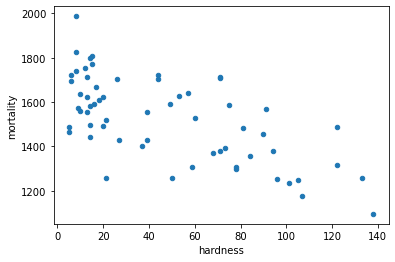

In [4]:
data.plot(kind='scatter', x='hardness', y='mortality')# строим точечную диаграмму с зависимостью уровня сметроности от жесткости воды

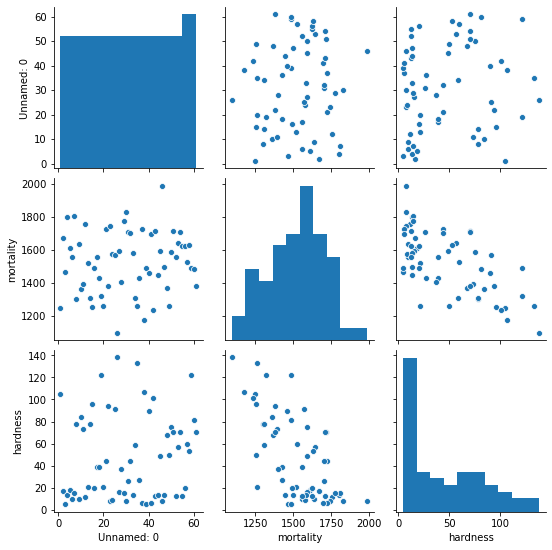

In [5]:
sns.pairplot(data) # смотрим, какие еще есть зависимости по таблице

In [6]:
data[['hardness', 'mortality']].corr() # считаем коррекляцию Пирсена

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [7]:
data[['hardness', 'mortality']].corr(method='spearman') # считаем коррекляцию Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [8]:
data[['hardness', 'mortality']].corr(method='kendall') # считаем корреляцияю Кендела

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


# Модель регрессии

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = data[['hardness']]
y = data['mortality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train.shape

(42, 1)

In [14]:
y_train.shape

(42,)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [16]:
model.coef_

array([-3.13167087])

In [17]:
model.intercept_

1668.9722977277095

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [19]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

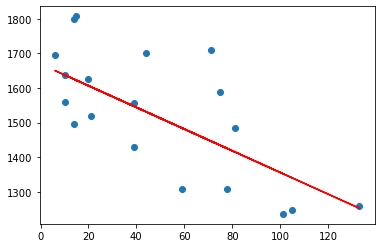

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [22]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
X_const = sm.add_constant(X_train)

In [25]:
X_const.shape

(42, 2)

In [26]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [27]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           7.83e-06
Time:                        17:31:00   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [28]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


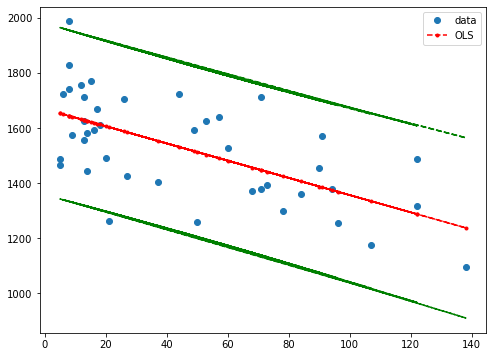

In [29]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

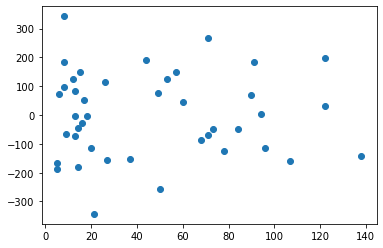

In [30]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

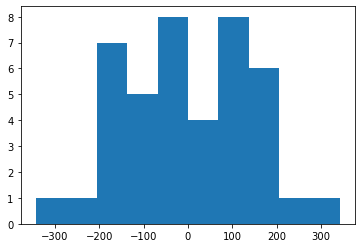

In [31]:
plt.hist(results.resid)

# Задание 2

In [32]:
data = pd.read_csv('water.csv') # читаем файл с данными
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [35]:
south = data.loc[data['location'] == 'South']
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


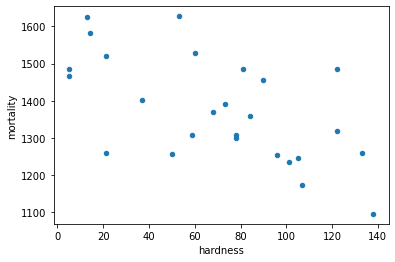

In [37]:
south.plot(kind='scatter', x='hardness', y='mortality')

In [38]:
south[['hardness', 'mortality']].corr() # считаем коррекляцию Пирсена

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [39]:
south[['hardness', 'mortality']].corr(method='spearman') # считаем коррекляцию Спирмена

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [40]:
X = south[['hardness']]
y = south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_
y_pred = model.predict(X_test)
y_pred
model.score(X_test, y_test)


-2.5519223012352077

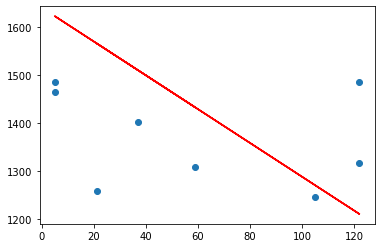

In [41]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [43]:
north = data.loc[data['location'] == 'North']
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


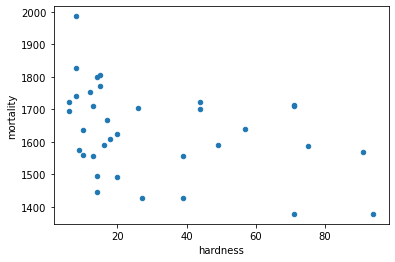

In [46]:
north.plot(kind='scatter', x='hardness', y='mortality')

In [47]:
north[['hardness', 'mortality']].corr() # считаем коррекляцию Пирсена

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [48]:
north[['hardness', 'mortality']].corr(method='spearman') # считаем коррекляцию Спирмена

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [49]:
X = north[['hardness']]
y = north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_
y_pred = model.predict(X_test)
y_pred
model.score(X_test, y_test)

0.018885304285745863

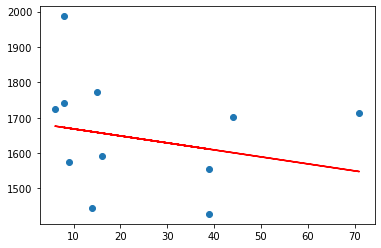

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')